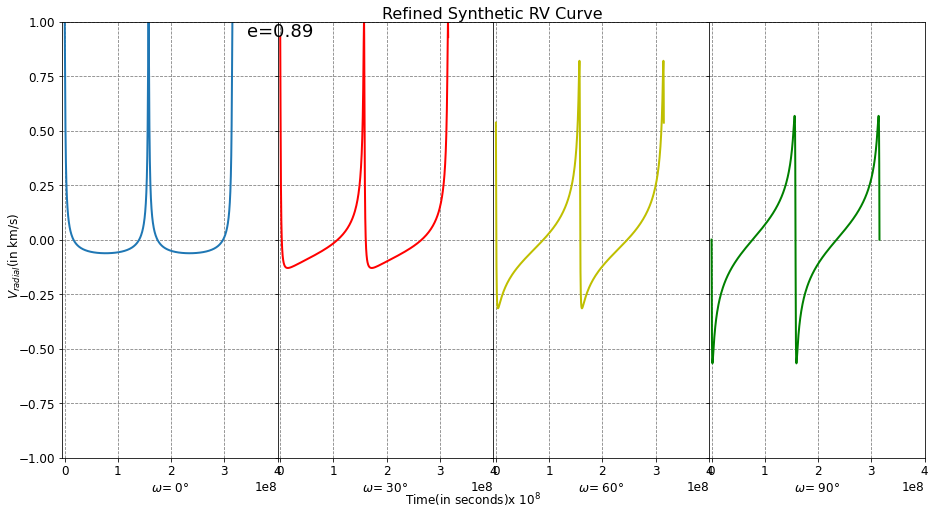

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.widgets import Slider


i=np.deg2rad(60)
a_star=0.05*1.5*(10**11)
P=5*365*24*3600
theta= np.linspace(0, 4 * (np.pi),720,endpoint=True)




def rad_vel(w,e):
    w_=np.deg2rad(w)

    omega = (2 * (np.pi) * ((1 + e * (np.cos(theta))) ** 2)) / (P * ((1 - e ** 2) ** 1.5))
    K = (2 * (np.pi) * a_star * (np.sin(i))) / P
    d_theta = theta[1] - theta[0]
    dt = d_theta / omega
    dt_ = np.cumsum(dt)
    t = np.array([0])
    t_final= np.append(t, dt_[0:719])
    v_r = K * (e * (np.cos(w_)) + np.cos(w_ + theta)) / (np.sqrt(1 - (e ** 2)))
    return(t_final,(v_r/1000))




#vr=rad_vel(w,0.7)[1]


plt.rcParams.update({'font.size': 12})
fig,axs = plt.subplots(nrows=1,ncols=4,sharex=True, sharey=True,figsize=(13,7),gridspec_kw={'hspace': 0,'wspace':0})
fig.text(0.52, 0.97,"Refined Synthetic RV Curve", ha='center',fontsize=16)
fig.text(0.5, 0.005,"Time(in seconds)x $10^8$", ha='center')
fig.text(0.002, 0.5,"$V_{radial}$(in km/s)", va='center',rotation='vertical')

w=[0,30,60,90]
for j in range(4):
    axs[j].set_xlim(-(5e+06),4e+08)
    axs[j].set_ylim(-1, 1)
    axs[j].grid(color='grey', linestyle='--')
    axs[j].set_xlabel(r'$\omega$= '+str(w[j])+'°')


fig.tight_layout()

line, = axs[0].plot([], [], lw = 2)
line1,= axs[1].plot([], [], lw = 2,color='r')
line2,= axs[2].plot([], [], lw = 2,color='y')
line3,= axs[3].plot([], [], lw = 2,color='green')


#text=fig.text(0.5, 0.95, 'edc')
text=axs[1].text(0.8,0.93,'', style='normal',ha='center', fontsize=18, color="black")

def init():
    line.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    text.set_text('')
    return line,line1,line2,line3,text


def animate(i):
    e=0.01*i
    t= rad_vel(0, e)[0]

    vr_final = []
    for omega in w:
        v=rad_vel(omega,e)[1]
        vr_final.append(v)

    y = vr_final[0]
    y1 = vr_final[1]
    y2 = vr_final[2]
    y3 = vr_final[3]

    line.set_data(t,y)
    line1.set_data(t,y1)
    line2.set_data(t,y2)
    line3.set_data(t,y3)
    text.set_text('e='+str(e))
    return line,line1,line2,line3,text


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=120,blit=True)
anim.save('Refining Synthetic RV Curve.gif', writer='imagemagick')

plt.show()